## Esmeralda z-effect study

### GD/ JAH   17/10/19

In [368]:
import time
print(time.asctime())

Wed Oct 30 19:08:33 2019


In [369]:
%load_ext autoreload
%autoreload 2

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import utils             as ut

import invisible_cities.core.fit_functions as fitf

to_df = pd.DataFrame.from_records

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [370]:
#datadir  = "/home/jrenner/analysis/7431/hdf5/JJ_maps_100_7430_7433/ntuple/trigger2"
#filename = "/ntuple_9040_7431_trigger2_v1.1.0_20190801_bg.h5"

run_numbers = [7430, 7431, 7432, 7433, 7435]
type_peak  = 'phpsel'
#idatadir   = f"/home/hernando/ICAROSNB/JAH/esmes"
ifiles     = [f"/home/hernando/ICAROSNB/JAH/esmes/esmeralda_{run_number}_{type_peak}_script.h5" 
              for run_number in run_numbers]

In [371]:
ktype = 'dsp' if type_peak == 'dspsel' else 'php'
df = ut.complete_df_from_files(ifiles, ktype)

/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7430_phpsel_script.h5
transfering variables...
computing variables...
correction factors  0.000675287356321839 -0.0003735632183908046 90.0
corrections...
/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7431_phpsel_script.h5
transfering variables...
computing variables...
correction factors  0.000675287356321839 -0.0003735632183908046 90.0
corrections...
/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7432_phpsel_script.h5
transfering variables...
computing variables...
correction factors  0.000675287356321839 -0.0003735632183908046 90.0
corrections...
/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7433_phpsel_script.h5
transfering variables...
computing variables...
correction factors  0.000675287356321839 -0.0003735632183908046 90.0
corrections...
/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7435_phpsel_script.h5
transfering variables...
computing variables...
correction factors  0.000675287356321839 -0.0003735632183908046 90.0
corrections...


In [517]:
write = True
if (write):
    ofile = f"/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_{type_peak}_1030.h5"
    print('write onto ', ofile)
    df.to_hdf(ofile, 'esmes')

write onto  /home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_phpsel_1030.h5


In [373]:
eref = np.mean(df.energy)
fen, fec, fek, fel = 1., eref/np.mean(df.ecc), eref/np.mean(df.ecdz), eref/np.mean(df.ecln)
print(fec*np.mean(df.ecc), fek*np.mean(df.ecdz), fel*np.mean(df.ecln))

2.703431769991037 2.703431769991037 2.703431769991037


In [374]:
df.energy = 1000. * fen * df.energy
df.ecln   = 1000. * fel * df.ecln
df.ecc    = 1000. * fec * df.ecc
df.ecdz   = 1000. * fek * df.ecdz

In [375]:
isel = (df.S1e < 2000.) & (df.nS2 == 1) & (df.r_max < 180.) & (df.dz < 180.)
sdf = df[isel]

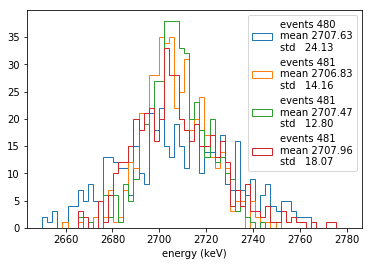

In [376]:
nbins = 60
erange = (1600., 1700.) if type_peak is 'dspsel' else (2650., 2780.)
#erange = (2500., 2900.)
ut.hist(sdf.energy.values, nbins, erange);
ut.hist(sdf.ecln  .values, nbins, erange, fig = False);
ut.hist(sdf.ecdz  .values, nbins, erange, fig = False);
ut.hist(sdf.ecc   .values, nbins, erange, fig = False);
plt.xlabel('energy (keV)');

energy resolution =   2.27 FWHM
energy resolution =   1.15 FWHM
energy resolution =   1.04 FWHM
energy resolution =   1.48 FWHM


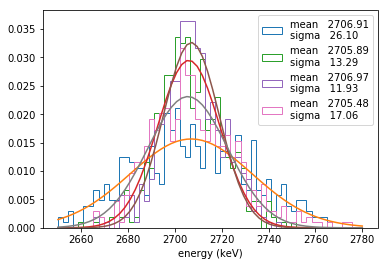

In [377]:
ut.plot_energy_resolution(sdf.energy.values, nbins, erange);
ut.plot_energy_resolution(sdf.ecln  .values, nbins, erange);
ut.plot_energy_resolution(sdf.ecdz  .values, nbins, erange);
ut.plot_energy_resolution(sdf.ecc   .values, nbins, erange);
plt.xlabel('energy (keV)');

## Position of the blobs

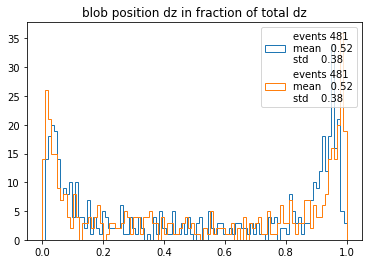

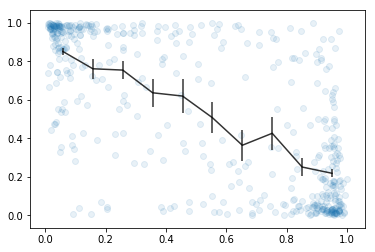

In [378]:
ut.hist(sdf.fdzb1, 100);
ut.hist(sdf.fdzb2, 100, fig = False);
plt.title('blob position dz in fraction of total dz')
ut.hpscatter(sdf.fdzb1, sdf.fdzb2, alpha = 0.1);

dz at  0.0 :  25.553187500000035
dz at  25.0 :  63.89156249999999
dz at  33.0 :  71.49996249999998
dz at  50.0 :  83.55137500000001
dz at  66.0 :  95.49147499999998
dz at  75.0 :  105.45649999999998
dz at  100.0 :  179.6519375


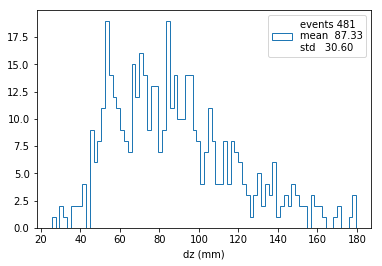

In [381]:
ut.hist(sdf.dz, 80);
plt.xlabel('dz (mm)');
for per in [0., 25., 33., 50., 66., 75., 100.]:
    print('dz at ', per, ': ', np.percentile(sdf.dz, per))

In [448]:
# select left and right blob
dzmin, dzmax= 25., 180.
sel_dzrange = (sdf.dz > dzmin) & (sdf.dz < dzmax)      # dz in range
sel_b1b2  = (sdf.fdzb2 > 0.8) & (sdf.fdzb1 < 0.2)    # b1-left and b2-right
sel_b2b1  = (sdf.fdzb2 < 0.2) & (sdf.fdzb1 > 0.8)    # b1-left and b2-right
sel_bcor  = ~np.logical_or(sela, selb)
sel_b1    =  sdf.eblob1 > 0.160 
sel_b1l   =  sel_b1 & (sdf.fdzb1 < 0.2)
sel_b1r   =  sel_b1 & (sdf.fdzb1 > 0.8)
sel_b2    =  sdf.eblob2 > 0.160 # 0.160

sel_long  =  sdf.dz >= np.percentile(sdf.dz, 75.)

#sela = sel_b1b2 & sel_dzrange & sel_b1 #& ~sel_b2
#selb = sel_b2b1 & sel_dzrange & sel_b1 #& ~sel_b2
#selc = sel_bcor & sel_dzrange & sel_b1 #& ~sel_b2

sela = sel_b1l & sel_dzrange #& ~sel_b2
selb = sel_b1r & sel_dzrange #& ~sel_b2
selc = (~np.logical_or(sel_b1l, sel_b1r)) & sel_dzrange & sel_b1

selal = sela & sel_long
selbl = selb & sel_long
selcl = selc & sel_long


print('number of events blob1 on left  ', np.sum(sela), np.sum(selal))
print('number of events blob1 on right ', np.sum(selb), np.sum(selbl))
print('number of events rest           ', np.sum(selc), np.sum(selcl))

number of events blob1 on left   153 55
number of events blob1 on right  189 54
number of events rest            120 10


In [449]:
#ut.hpscatter(sdf.fdzb1[sela], sdf.fdzb2[sela], alpha = 0.1);
#ut.hpscatter(sdf.fdzb1[selb], sdf.fdzb2[selb], alpha = 0.1);
#ut.hpscatter(sdf.fdzb1[selc], sdf.fdzb2[selc], alpha = 0.1);

In [450]:
#ylabels = ['slcq'+str(i) for i in range(nslices)]
#xlabels = ['dz']
#for ylabel in ylabels:
#    ut.inspect_corr(ylabel, sdf, xlabels, alpha = 0.5, nbins_profile = 30, c = 'grey');

In [451]:
#nslices = 7
#ylabels = ['slce'+str(i) for i in range(nslices)]
#xlabels = ['dz']
#for ylabel in ylabels:
#    ut.inspect_corr(ylabel, sdf, xlabels, alpha = 0.5, nbins_profile = 30, c = 'grey');

## Study slices vs dz

### total energy vs dz for the different samples

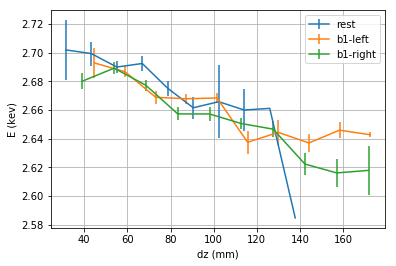

In [452]:
bins = 10
etot  = ut.slices_total(sdf[selc], nslices)
#ectot = ut.slices_total(sdf[selc], nslices, 'slcec')
etota = ut.slices_total(sdf[sela], nslices)
etotb = ut.slices_total(sdf[selb], nslices)
ut.hprofile(sdf[selc].dz, etot  , nbins_profile = bins, fig = True , label = 'rest' )
#ut.hprofile(sdf[selc].dz, ectot , nbins_profile = 16, fig = False, label = 'cor' )
ut.hprofile(sdf[sela].dz, etota , nbins_profile = bins, fig = False, label = 'b1-left')
ut.hprofile(sdf[selb].dz, etotb , nbins_profile = bins, fig = False, label = 'b1-right')
plt.grid(); plt.legend();
plt.xlabel('dz (mm)');
plt.ylabel('E (kev)');

#### all samples seems to loose same energy vs dz

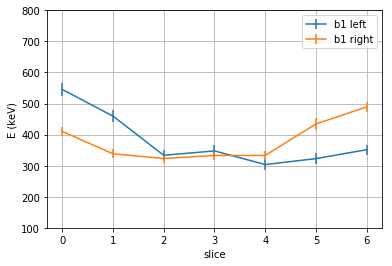

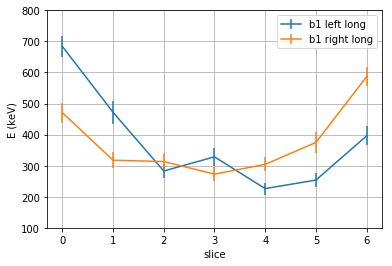

In [468]:
norma = False
ut.plt_slices(sdf[sela], nslices, label = 'b1 left', norma = norma);
ut.plt_slices(sdf[selb], nslices, label = 'b1 right', fig = False, norma = norma);
#ut.plt_slices(sdf[selc], nslices, label = 'b1 center', fig = False, normam = norma);
plt.xlabel('slice'); plt.ylabel('E (keV)'); plt.legend(); plt.grid();
plt.ylim(100., 800.);

ut.plt_slices(sdf[selal], nslices, label = 'b1 left long', norma = norma);
ut.plt_slices(sdf[selbl], nslices, label = 'b1 right long', fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('E (keV)'); plt.legend(); plt.grid();
plt.ylim(100., 800.);

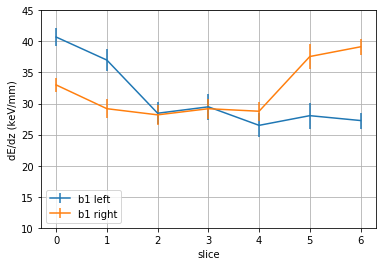

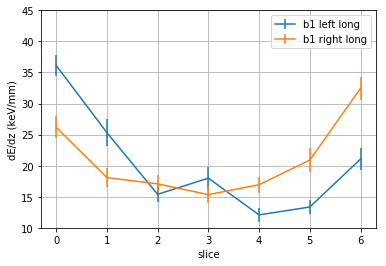

In [471]:
norma = True
ut.plt_slices(sdf[sela], nslices, label = 'b1 left', norma = norma);
ut.plt_slices(sdf[selb], nslices, label = 'b1 right', fig = False, norma = norma);
#ut.plt_slices(sdf[selc], nslices, label = 'b1 center', fig = False, normam = norma);
plt.xlabel('slice'); plt.ylabel('dE/dz (keV/mm)'); plt.legend(); plt.grid();
plt.ylim(10., 45.);

ut.plt_slices(sdf[selal], nslices, label = 'b1 left long', norma = norma);
ut.plt_slices(sdf[selbl], nslices, label = 'b1 right long', fig = False, norma = norma);
plt.xlabel('slice'); plt.ylabel('dE/dz (keV/mm)'); plt.legend(); plt.grid();
plt.ylim(10., 45.);

### Slices vs dz

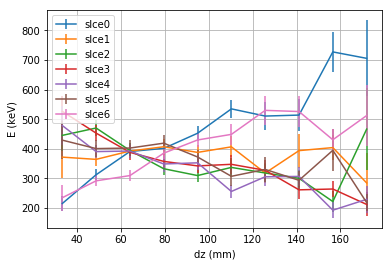

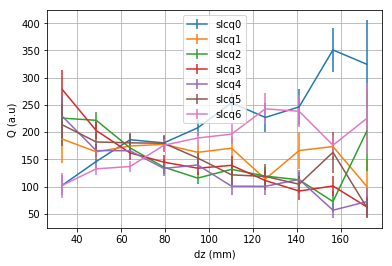

In [397]:
nslices = 7
ut.hprofile_slices(sdf, nslices, label = 'slce'  , bins = bins);
#ut.hprofile_slices(sdf, nslices, label = 'slcec' , bins = bins);
ut.hprofile_slices(sdf, nslices, label = 'slcq'  , bins = bins, factor = 1./22.);
plt.ylabel('Q (a.u)');

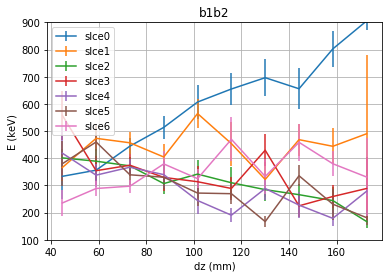

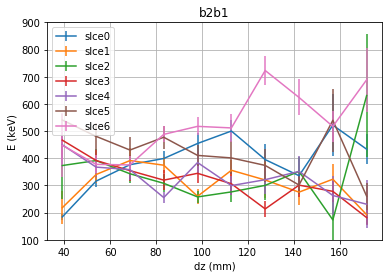

In [398]:
ut.hprofile_slices(sdf[sela], nslices, 'slce', bins = 10);
plt.title('b1b2'); plt.ylim(100., 900.);
ut.hprofile_slices(sdf[selb], nslices, 'slce', bins = 10);
plt.title('b2b1'); plt.ylim(100., 900.);

In [399]:
#ut.hprofile_slices(sdf[sela], nslices, 'slcec', bins = bins);
#plt.title('b1b2'); plt.ylim(100., 900.);
#ut.hprofile_slices(sdf[selb], nslices, 'slcec', bins = bins);
#plt.title('b2b1'); plt.ylim(100., 900.);

In [214]:
#ut.hprofile_slices(sdf[sela], nslices, 'slce', bins = 14, norma = True);
#plt.title('b1 left');
#plt.ylabel('dEdz (keV/mm)')
#ut.hprofile_slices(sdf[selb], nslices, 'slce', bins = 14, norma = True);
#plt.title('b1 right');
#plt.ylabel('dEdz (keV/mm)');

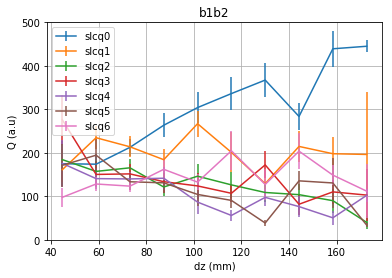

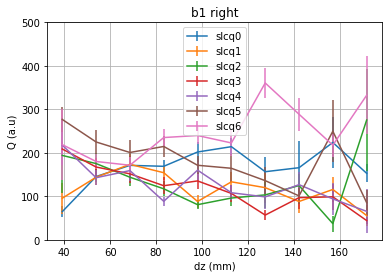

In [400]:
ut.hprofile_slices(sdf[sela], nslices, 'slcq', bins = 10, factor = 1./22.);
plt.title('b1b2'); plt.ylabel('Q (a.u)'); plt.ylim(0., 500.);
ut.hprofile_slices(sdf[selb], nslices, 'slcq', bins = 10, factor = 1./22.);
plt.title('b1 right'); plt.ylabel('Q (a.u)');  plt.ylim(0., 500.);

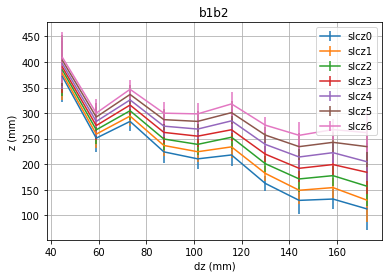

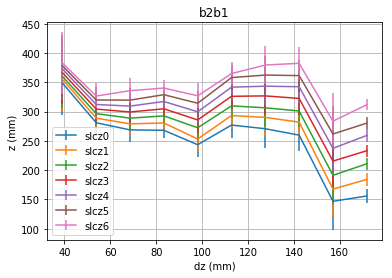

In [401]:
ut.hprofile_slices(sdf[sela], nslices, 'slcz', bins = 10, factor = 1.);
plt.title('b1b2'); plt.ylabel('z (mm)')
ut.hprofile_slices(sdf[selb], nslices, 'slcz', bins = 10, factor = 1.);
plt.title('b2b1'); plt.ylabel('z (mm)');

## Profiles of the blob1

## all tracks left/right

In [505]:
dzrange, erange, bins = (-120., 120), (0., 120.), 40

ldf   = ut.dfslices(sdf[sela] , nslices)
rdf   = ut.dfslices(sdf[selb], nslices)

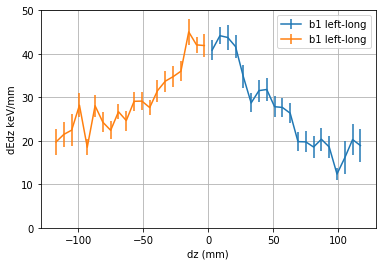

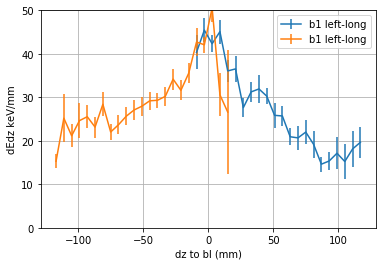

In [506]:
ut.plt_slices_profile(ldf, rdf, 'b1 left-long', 'b1 right-long', dzrange, erange);

## long tracks left/right

In [507]:
dzrange, erange, bins = (-120., 120), (0., 120.), 40

ldf   = ut.dfslices(sdf[selal] , nslices)
rdf   = ut.dfslices(sdf[selbl], nslices)

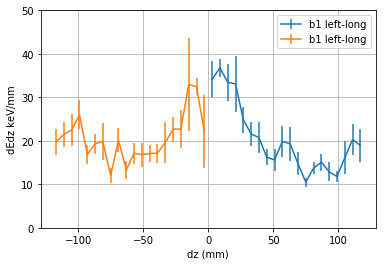

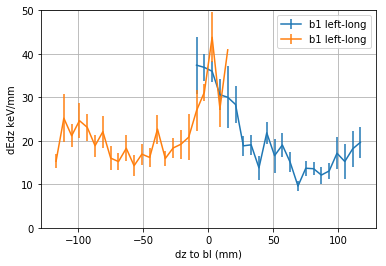

In [508]:
ut.plt_slices_profile(ldf, rdf, 'b1 left-long', 'b1 right-long', dzrange, erange);

## Extra studies

In [509]:
ei  = ut.slices_total(sdf[ksel_left], (0, 1))
eta = ut.slices_total(sdf[ksel_left], nslices)

ef  = ut.slices_total(sdf[ksel_right], (5, 6))
etb = ut.slices_total(sdf[ksel_right], nslices)

print('left  ', ut.stats(1000. * ei))
print('left  ', ut.stats(1000. * eta))
print('left  ', ut.stats(ei/eta))

print('right  ', ut.stats(1000. * ef))
print('right  ', ut.stats(1000. * etb))
print('right ', ut.stats(ef/etb))

left   (54, 1144.3020289570368, 301.34125972055375, 0)
left   (54, 2642.3569182511, 26.62542934443639, 0)
left   (54, 0.4326889357040932, 0.11272432684977708, 0)
right   (44, 971.8134582726617, 322.857402361541, 0)
right   (44, 2639.2654167035853, 24.329988334821245, 0)
right  (44, 0.3682454602209255, 0.12178934135477973, 0)


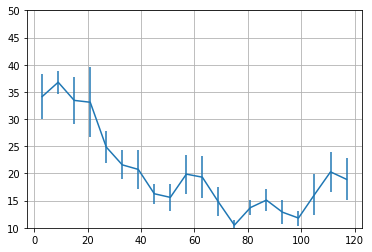

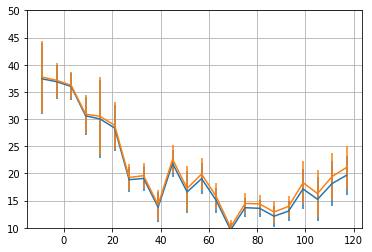

In [510]:
ldf   = ut.dfslices(sdf[selal], nslices)
ut.hprofile(ldf.dz, 1000.*ldf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)

plt.grid(); plt.ylim(10., 50);
ut.hprofile(ldf.dz1, 1000.*ldf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(ldf.dz1, 1000.*ldf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False)
plt.grid(); plt.ylim(10., 50);

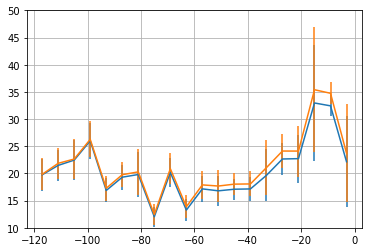

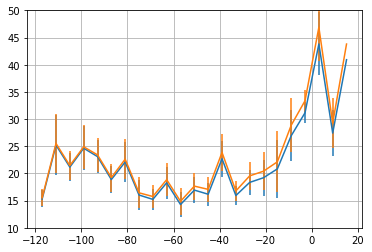

In [511]:
rdf   = ut.dfslices(sdf[selbl], nslices)
ut.hprofile(rdf.dzr, 1000.*rdf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(rdf.dzr, 1000.*rdf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False);
plt.grid(); plt.ylim(10., 50);
ut.hprofile(rdf.dz1, 1000.*rdf.ec , urange = dzrange, vrange = erange, nbins_profile = bins)
ut.hprofile(rdf.dz1, 1000.*rdf.ecc, urange = dzrange, vrange = erange, nbins_profile = bins, fig = False);
plt.grid(); plt.ylim(10., 50);

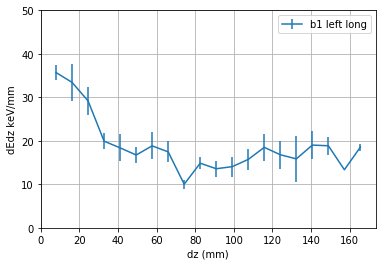

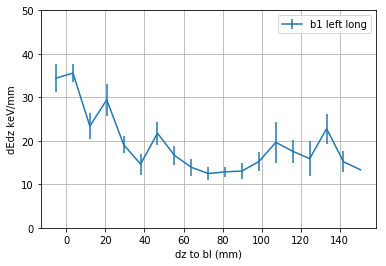

In [512]:
ut.plt_slices_profile(ldf, llabel = 'b1 left long', bins = 20);

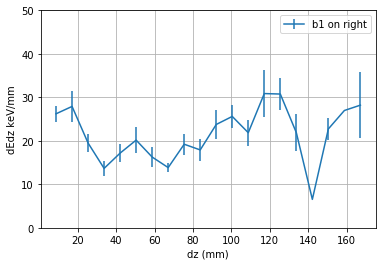

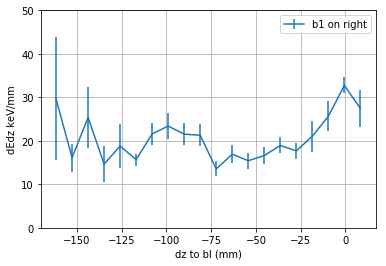

In [513]:
ut.plt_slices_profile(rdf, llabel = 'b1 on right', bins = 20);

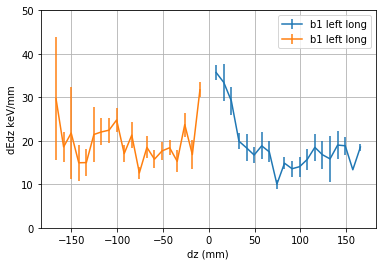

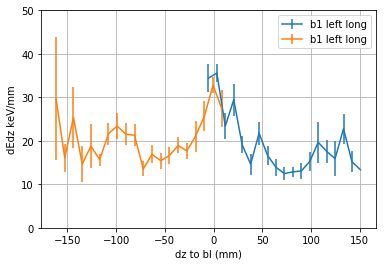

In [514]:
ut.plt_slices_profile(ldf, rdf, llabel = 'b1 left long', rlabel = 'b1 right long',  bins = 20);

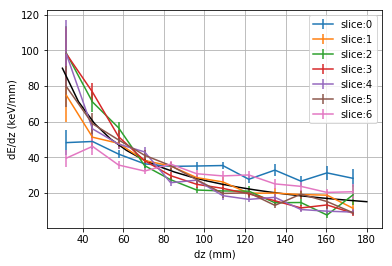

In [515]:
ksel = sdf.fdzb1 < 2.
for i in range(nslices):
    fig = True if i == 0 else False
    ut.hprofile(sdf.dz[ksel], nslices*1000.*sdf['slce'+str(i)][ksel]/sdf.dz[ksel],
                label = 'slice:'+str(i), fig = fig, nbins_profile = 12)
dzs = np.linspace(30., 180, 20)
plt.plot(dzs, 2700./dzs, c = 'black');
plt.xlabel('dz (mm)');
plt.ylabel('dE/dz (keV/mm)')
#plt.yscale('log')
plt.grid();
plt.legend();

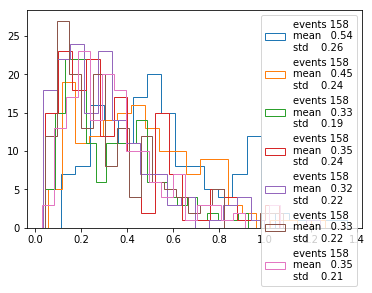

In [516]:
ksel = (sdf.fdzb1 < 0.2);
nslices = 7
for i in range(nslices):
    fig = True if i == 0 else False
    ut.hist(sdf['slce'+str(i)][ksel], 20, fig = fig)
plt.legend();

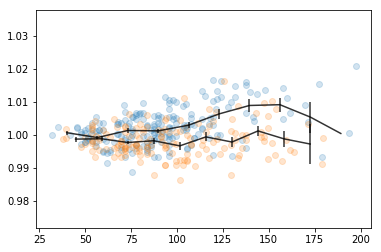

In [563]:
ut.hpscatter(sdf.dz[sela], sdf.ecc[sela]/sdf.ecdz[sela], alpha = 0.2);
ut.hpscatter(sdf.dz[selb], sdf.ecc[selb]/sdf.ecdz[selb], alpha = 0.2, fig = True);

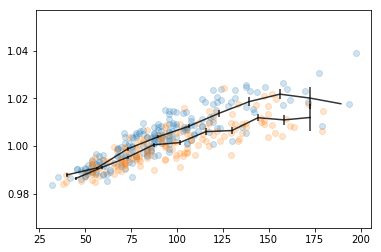

In [565]:
ut.hpscatter(sdf.dz[sela], sdf.ecc[sela]/sdf.energy[sela], alpha = 0.2);
ut.hpscatter(sdf.dz[selb], sdf.ecc[selb]/sdf.energy[selb], alpha = 0.2, fig = True);

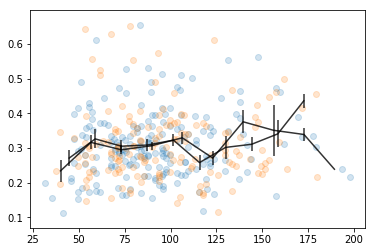

In [555]:
ut.hpscatter(sdf.dz[sela], sdf.eblob1[sela], alpha = 0.2);
ut.hpscatter(sdf.dz[selb], sdf.eblob1[selb], alpha = 0.2, fig = True);

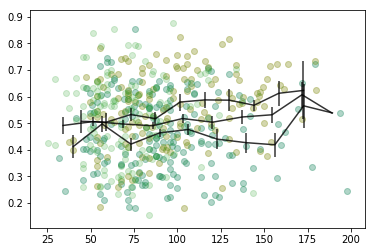

In [570]:
ut.hpscatter(sdf.dz[sela], sdf.eif[sela], alpha = 0.2);
ut.hpscatter(sdf.dz[selb], sdf.eif[selb], alpha = 0.2, fig = True);
ut.hpscatter(sdf.dz, sdf.eif, alpha = 0.2, fig = True);

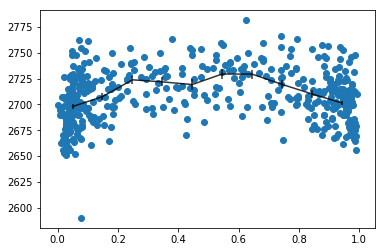

In [541]:
ut.hpscatter(sdf.dzb1/sdf.dz, sdf.energy);

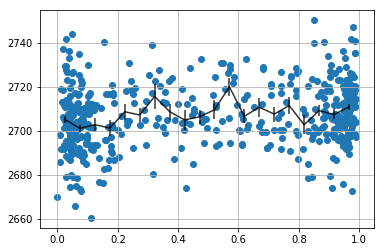

In [573]:
ut.hpscatter(sdf.dzb1/sdf.dz, sdf.ecln, nbins_profile = 20);
plt.grid();

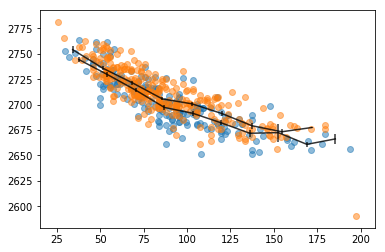

In [520]:
ksel = sdf.dzb1 < 15.
ut.hpscatter(sdf[ksel].dz, sdf.energy[ksel], alpha = 0.5);
ut.hpscatter(sdf[~ksel].dz, sdf.energy[~ksel], fig = True, alpha = 0.5);